In [141]:
# Include in the README

# Underfitting is usually caused due to either:
#         --> A lack of data to build an accurate model or attempting to build a linear
#         --> Building a linear model on non-linear data
# In both cases, the line is unable to accurately capture the patterns of the data.
# In the Example case: 
#                      Degree of 1 proved to underfit the data, having a high bias and a low variance
#                      Degree of 3 proved to fir the data correctly, having a low bias & variance
#                      Degree of 20 proved to overfit the data, having a low bias and a high variance

In [148]:
import operator

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [173]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

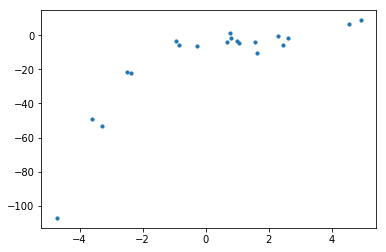

In [150]:
# Creating Example DataSet

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)
plt.scatter(x,y, s=10)
plt.show()

In [151]:
# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

In [153]:
polynomial_features = PolynomialFeatures(degree = 3)
x_poly = polynomial_features.fit_transform(x)

model = linear_model.LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

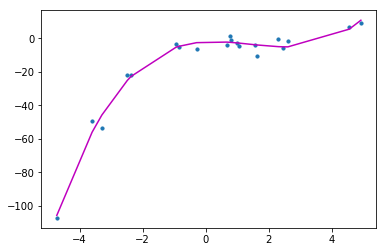

In [154]:
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

In [159]:
# Salaries Example (Data shows accelerated growth)

In [160]:
# Read Data
salaries = pd.read_csv("position_salaries.csv")
salaries.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


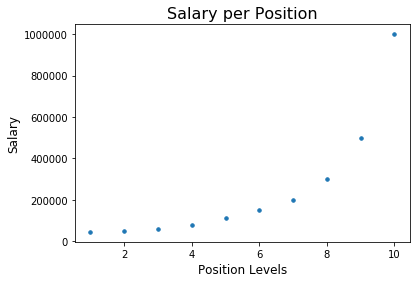

In [179]:
# Seperate & Display Data
X = salaries.iloc[:, 1:2]
y = salaries.iloc[:, 2:3]
plt.scatter(X, y, s=12)
plt.title("Salary per Position", fontsize=16)
plt.xlabel("Position Levels", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.show()

In [201]:
#Split, Train, and Predict
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)
polynomial_features = PolynomialFeatures(degree = 4)
x_poly = polynomial_features.fit_transform(X)
poly_reg = linear_model.LinearRegression()
poly_reg.fit(x_poly, y)
predictions = poly_reg.predict(x_poly)

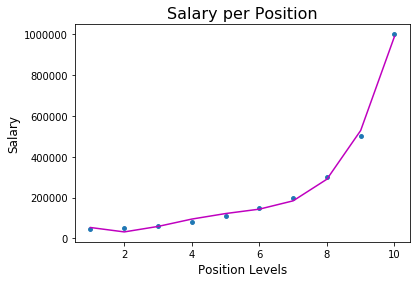

In [202]:
# Display Predictions
plt.scatter(X, y, s=15)
plt.plot(X, predictions, color="m")
plt.title("Salary per Position", fontsize=16)
plt.xlabel("Position Levels", fontsize=12)
plt.ylabel("Salary", fontsize=12)
plt.show()